# Perceptron

<img src='media/perceptron.jpeg' width="400">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
def sign(z):
    if z > 0:
        return 1
    return -1


def generate_x_dot(x):
    """
    X is a matrix size n*f, where:
    - n is the number of sample x in X
    - f is the number of features of a single sample x
    """
    ones = np.ones((x.shape[0], 1))
    return np.concatenate((ones, x), axis = 1)


def predict_single_data(x_dot, w_dot):
    """
    x_dot is an array contains f+1 element, where
    - f is the number of feature of x
    - w_dot is a column vector that has the same size with x_dot
    """
    y_hat = sign(np.dot(x_dot, w_dot))
    return y_hat


def predict(X_dot, w_dot):
    """
    X_dot is a matrix size n*(f+1), where:
    - n is the number of sample x_dot in X_dot
    - f is the number of feature of x in X
    """
    return [predict_single_data(x_dot, w_dot) for x_dot in X_dot]


def update_w_dot(x_dot, w_dot, y, learning_rate):
    """
    x_dot is an array contains f+1 element, where
    f is the number of feature of x
    w_dot is a column vector that has the same size with x_dot
    y is the corresponding label of current x_dot
    """
    delta = - x_dot * y
    return w_dot - learning_rate*delta.reshape(3,1)


def train(x, y, epochs, learning_rate):
    """
    X is a matrix size n*f, where:
    n is total sample x in X
    f is the number of feature of x in X
    y is an array of known labels corresponding to each sample x in X
    epochs is total training loops over data set
    learning_rate is eta in formal equation (lecture note)
    """
    x_dot = generate_x_dot(x)
    w_dot = np.zeros((x_dot.shape[1], 1))

    for epoch in range(epochs):
        for i in range(x_dot.shape[0]):
            y_hat = predict_single_data(x_dot[i], w_dot)
            if y_hat != y[i]:
                w_dot = update_w_dot(x_dot[i], w_dot, y[i], learning_rate)
    return w_dot

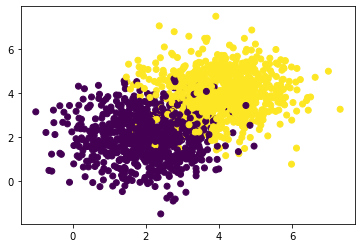

In [3]:
# Generate data set
n = 1000
means = [[2, 2], [4, 4]]
cov = [[1, 0], [0, 1]]
c = 2

X_0 = np.random.multivariate_normal(means[0], cov, n)
X_1 = np.random.multivariate_normal(means[1], cov, n)

X = np.concatenate((X_0, X_1), axis = 0)
y = np.array([[-1] * n, [1] * n]).reshape(c*n,)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.20)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

In [5]:
from sklearn.metrics import accuracy_score


w_dot = train(X_train, y_train, learning_rate=0.001, epochs = 100)
X_dot_test = generate_x_dot(X_test)
y_pred = predict(X_dot_test, w_dot)

print(y_pred)
print("Accuracy: %.2f %%" % (100 * accuracy_score(y_test, y_pred)))

[1, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1

<Figure size 432x288 with 0 Axes>

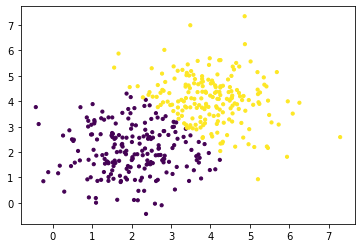

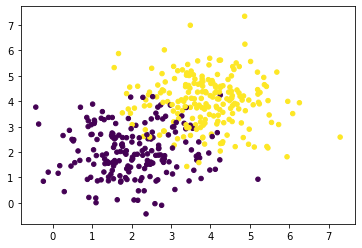

<Figure size 432x288 with 0 Axes>

In [6]:
# Visulize X_test on 2D graph, colored by y_test
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, s=10)
plt.figure()
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, s=20)
plt.figure()